In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [43]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [2]:
df=pd.read_csv('../data/Season_2018.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df2=pd.read_csv('../data/Playoffs_2018.csv').drop('Unnamed: 0',axis=1)

Find and eliminate NaNs

In [7]:
# df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
#          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
# df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
#          'H_Opp_win_probability_subtracted','H_median_odds','A_median_odds','fav_win','home_fav'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.527789
0    0.472211
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.552632
0    0.447368
Name: home_win, dtype: float64

In [11]:
df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,CHC,43.000000,1.000000,6.000000,1.000000,0.690000,5.000000,16.000000,50.000000,0.140000,...,11.666667,14.333333,6.666667,0.0,61.833333,1.333333,0.000000,0.468500,4.033333,0
1,NYY,32.857143,4.428571,7.571429,4.428571,4.554286,4.428571,8.142857,38.000000,0.227857,...,11.000000,13.000000,7.000000,0.0,61.000000,2.000000,0.000000,0.346000,2.600000,1
2,MIL,34.666667,3.666667,8.416667,3.333333,3.730833,4.083333,10.083333,39.000000,0.244167,...,11.666667,14.333333,6.666667,0.0,61.833333,1.333333,0.000000,0.468500,4.033333,1
4,LAD,33.941176,3.764706,7.000000,3.529412,3.535294,4.470588,10.647059,39.294118,0.206765,...,10.000000,12.200000,5.200000,0.0,59.400000,1.000000,0.000000,0.062600,1.360000,1
5,BOS,35.125000,5.687500,8.375000,5.437500,5.710000,4.062500,8.312500,40.000000,0.238750,...,13.285714,13.142857,6.714286,0.0,49.857143,3.285714,1.000000,0.090143,0.214286,1
7,HOU,34.125000,5.250000,8.875000,5.125000,5.157500,4.875000,8.375000,40.125000,0.256250,...,11.000000,16.000000,6.666667,0.0,64.000000,1.333333,0.666667,0.291333,2.633333,1
12,BOS,35.125000,5.687500,8.375000,5.437500,5.710000,4.062500,8.312500,40.000000,0.238750,...,13.285714,13.142857,6.714286,0.0,49.857143,3.285714,1.000000,0.090143,0.214286,0
14,ATL,30.200000,2.800000,4.600000,2.800000,3.100000,2.600000,8.600000,33.200000,0.150600,...,11.176471,13.176471,5.882353,0.0,51.529412,2.117647,0.823529,0.121941,0.858824,1
15,COL,34.833333,1.000000,5.833333,1.000000,0.830000,2.666667,10.833333,38.000000,0.162000,...,11.083333,11.333333,5.250000,0.0,52.166667,2.416667,0.750000,0.088500,0.775000,0
17,NYY,32.857143,4.428571,7.571429,4.428571,4.554286,4.428571,8.142857,38.000000,0.227857,...,12.062500,13.875000,5.375000,0.0,46.687500,2.375000,1.437500,-0.069688,-0.968750,0


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.753086,4.172840,7.913580,4.006173,3.957531,3.493827,8.666667,38.129630,0.227963,...,16.104938,25.104938,12.265432,14.135802,6.796296,0.012346,50.376543,-0.040932,-0.425309,1
1,TEX,33.660494,4.549383,8.074074,4.296296,4.298580,3.425926,9.160494,38.043210,0.234926,...,18.549383,25.808642,10.456790,12.543210,5.716049,0.006173,48.870370,-0.019704,-0.457407,0
2,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,15.185185,26.271605,12.117284,13.913580,6.697531,0.012346,51.425926,-0.004728,-0.308642,0
3,KCR,33.981481,3.938272,8.333333,3.740741,3.663580,2.635802,8.086420,37.425926,0.241000,...,15.055556,24.962963,11.197531,15.561728,6.635802,0.012346,54.080247,0.056796,0.490741,0
4,SDP,33.864198,3.808642,7.956790,3.598765,3.550988,2.907407,9.401235,37.401235,0.231272,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0


In [30]:
#for col in X_train.columns:
    #print(col)

In [13]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [14]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [21]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.753086,4.172840,7.913580,4.006173,3.957531,3.493827,8.666667,38.129630,0.227963,...,16.104938,25.104938,12.265432,14.135802,6.796296,0.012346,50.376543,-0.040932,-0.425309,1
1,TEX,33.660494,4.549383,8.074074,4.296296,4.298580,3.425926,9.160494,38.043210,0.234926,...,18.549383,25.808642,10.456790,12.543210,5.716049,0.006173,48.870370,-0.019704,-0.457407,0
2,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,15.185185,26.271605,12.117284,13.913580,6.697531,0.012346,51.425926,-0.004728,-0.308642,0
3,KCR,33.981481,3.938272,8.333333,3.740741,3.663580,2.635802,8.086420,37.425926,0.241000,...,15.055556,24.962963,11.197531,15.561728,6.635802,0.012346,54.080247,0.056796,0.490741,0
4,SDP,33.864198,3.808642,7.956790,3.598765,3.550988,2.907407,9.401235,37.401235,0.231272,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0


In [34]:
df2.drop(droper,axis=1,inplace=True)

In [33]:
set(dd) - set(dr)
droper=list(set(dd) - set(dr))

In [35]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [36]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [38]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [87]:
X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [39]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

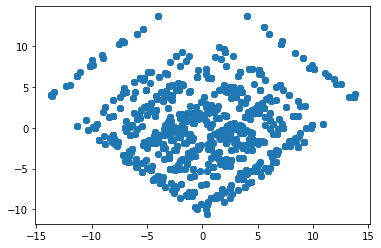

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [40]:
def feature_select(X_train,y_train,estimator,min_features,step=1):
    estimator2=estimator()
    selector=RFECV(estimator2,min_features_to_select=min_features,step=step)
    selector.fit(X_train,y_train)
    selector.ranking_
    feature_dict=dict(zip(X_train.columns, selector.ranking_))
    best_pred = [k for (k,v) in feature_dict.items() if v == 1]
    
    
    return best_pred

In [41]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [42]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5990131941792881
Train Mean Accuracy: 0.6097159324825031
Test Mean Accuracy: 0.7272727272727273
Recall Score: 0.8181818181818182
Precision Score: 0.6923076923076923
F1 Score: 0.7500000000000001


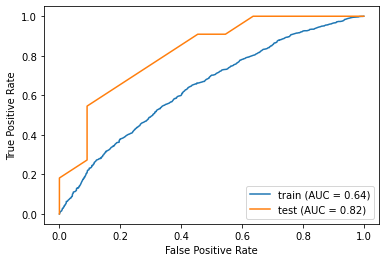

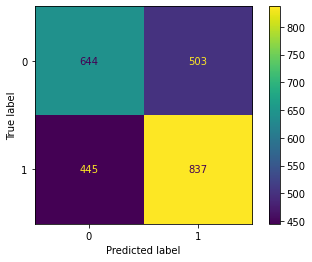

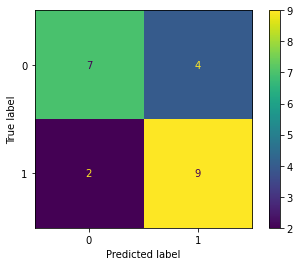

In [44]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

### Home_win, zero imp
***

In [45]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [46]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.6002477620805227
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.5454545454545454
Precision Score: 0.6666666666666666
F1 Score: 0.6


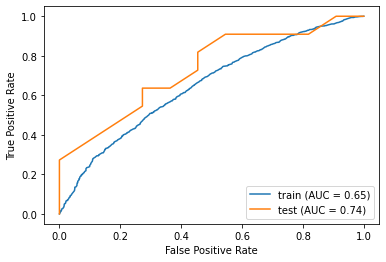

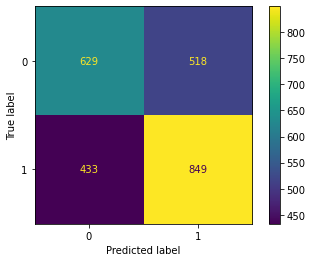

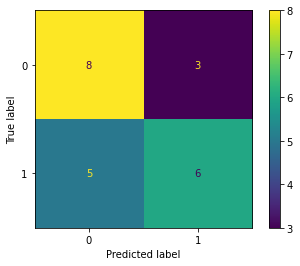

In [47]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

In [73]:
#kfeats= feature_select(X_train_scaled,y_train,KNN,min_features=10)
#X_train_best_knn = X_train_scaled[kfeats]
#X_test_best_knn = X_test_scaled[kfeats]

### Home win KNN

Number of Neighbors: 17
Metric: minkowski
Weights: uniform
Mean Cross-Val Score: 0.5730787832506046
Train Mean Accuracy: 0.6315356113627008
Test Mean Accuracy: 0.6818181818181818
Recall Score: 0.7272727272727273
Precision Score: 0.6666666666666666
F1 score: 0.6956521739130435


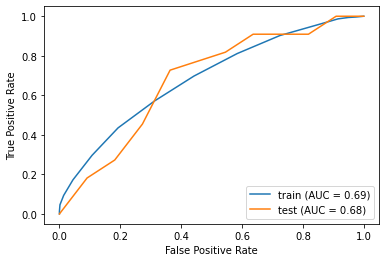

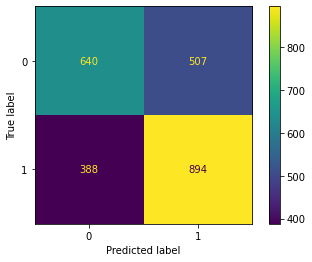

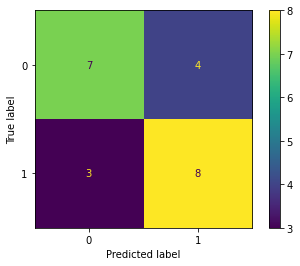

In [48]:
knn(zero_imp_train,zero_imp_test,y_train,y_test)

# Decision Tree

In [49]:
dfeats= feature_select(zero_imp_train,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = zero_imp_train[dfeats]
X_test_best_tree = zero_imp_test[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.5833778795978108
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


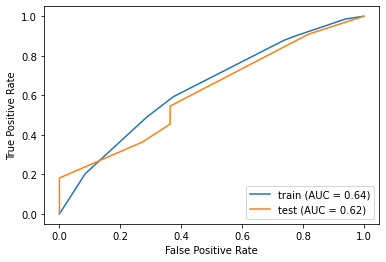

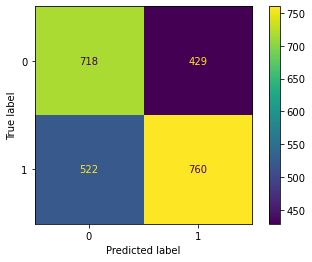

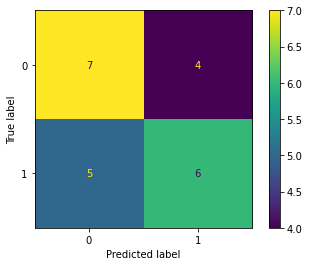

In [50]:
dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

# Random Forest

In [51]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

Number of Trees: 115
criterion: gini
Mean Cross-Val Score: 0.5438598277544441
Train Mean Accuracy: 0.6990531082750103
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.45454545454545453
Precision Score: 0.7142857142857143
F1 score: 0.5555555555555556


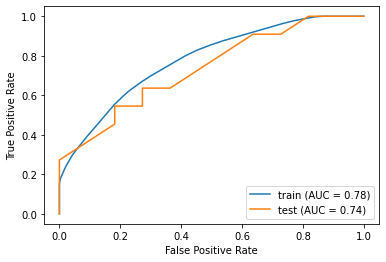

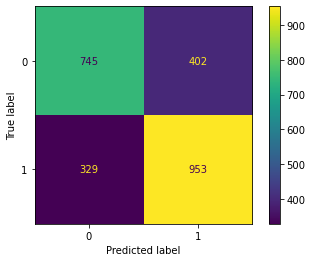

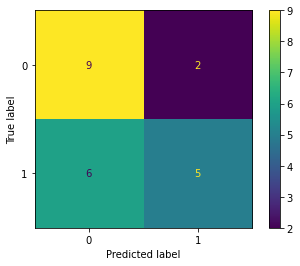

In [52]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


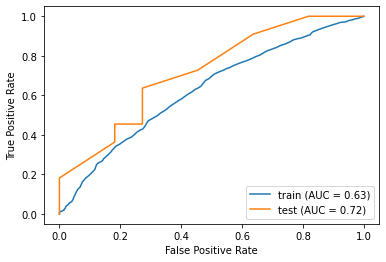

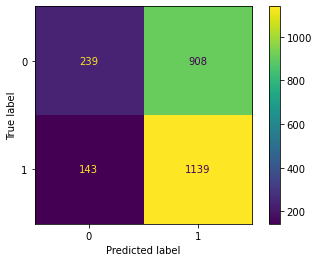

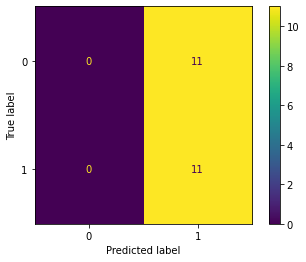

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


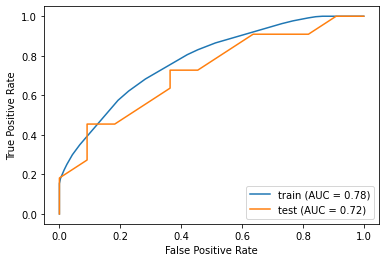

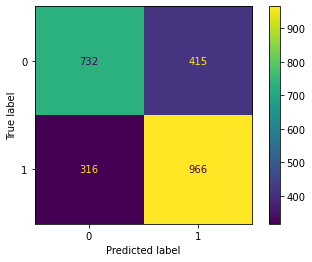

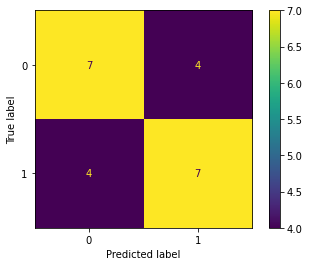

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)